# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [11]:
# check what last ten cities are 
cities[596:606]

['lazaro cardenas',
 'hirara',
 'westpunt',
 'teknaf',
 'pavlodar',
 'cuamba',
 'bosaso',
 'berdigestyakh',
 'tineo',
 'san juan del sur']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# test api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "kodiak"
build_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

response = requests.get(build_url)
print(response.status_code)
weather = response.json()

200


In [5]:
# View the JSON response from the API
print(weather)

{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.91, 'feels_like': 37.65, 'temp_min': 45.91, 'temp_max': 45.91, 'pressure': 1018, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 23.02, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1653147443, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1653140076, 'sunset': 1653201490}, 'timezone': -28800, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}


In [6]:

import pprint as pp
pp.pprint(weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.4072},
 'dt': 1653147443,
 'id': 5866583,
 'main': {'feels_like': 37.65,
          'humidity': 81,
          'pressure': 1018,
          'temp': 45.91,
          'temp_max': 45.91,
          'temp_min': 45.91},
 'name': 'Saint Paul Harbor',
 'sys': {'country': 'US',
         'id': 7668,
         'sunrise': 1653140076,
         'sunset': 1653201490,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 23.02}}


In [7]:
# Initialize variable (empty lists to store data from response)
lat = []
lng = []
country = []
clouds = []
date = []
name = []
wind = []
temp = []
pressure = []
humidity = []

# loop through cities and call API
for city in cities:
    
    # API request
    build_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(build_url)
    status_code = response.status_code
    print(f"{city}: {status_code}")
    print()
    
    # create try catch for cities with missing data
    try:
        # get response into JSON
        weather = response.json()
        
        # seperate and append the data into their respective lists
        
        # seperate
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        location = weather["sys"]["country"]
        cloudiness = weather["clouds"]["all"]
        dt = weather["dt"]
        city = weather["name"]
        wind_speed = weather["wind"]["speed"]
        main_temp = weather["main"]['temp']
        main_pressure = weather["main"]['pressure']
        main_humidity = weather["main"]['humidity']
        
        # append
        lat.append(latitude)
        lng.append(longitude)
        country.append(location)
        clouds.append(cloudiness)
        date.append(dt)
        name.append(city)
        wind.append(wind_speed)
        temp.append(main_temp)
        pressure.append(main_pressure)
        humidity.append(main_humidity)
        
    except Exception as e:
        print(e)
        
    time.sleep(1)
        

punta arenas: 200

yeppoon: 200

upernavik: 200

necochea: 200

vao: 200

vaini: 200

jamestown: 200

tsihombe: 404

'coord'
prince rupert: 200

voh: 200

praxedis guerrero: 200

najran: 200

valparaiso: 200

cabo san lucas: 200

pedernales: 200

gambela: 200

shenjiamen: 200

busselton: 200

novyy urengoy: 200

yellowknife: 200

aklavik: 200

ushuaia: 200

palmer: 200

touros: 200

santa rosa: 200

meulaboh: 200

bredasdorp: 200

victoria: 200

albany: 200

mabaruma: 200

saint simons: 200

cabedelo: 200

hermanus: 200

east london: 200

belushya guba: 404

'coord'
tooele: 200

rikitea: 200

illoqqortoormiut: 404

'coord'
atuona: 200

makakilo city: 200

sentyabrskiy: 404

'coord'
singapore: 200

lebu: 200

bluff: 200

hamilton: 200

jiaojiang: 200

arlit: 200

goure: 200

nikolskoye: 200

hovd: 200

attawapiskat: 404

'coord'
la ronge: 200

norman wells: 200

puerto ayora: 200

rosarito: 200

cheremukhovo: 200

bambous virieux: 200

umzimvubu: 404

'coord'
hilo: 200

bengkulu: 200

l

ajdabiya: 200

chekhov: 200

yulara: 200

gigmoto: 200

bubaque: 200

iqaluit: 200

neustadt: 200

nelson bay: 200

semnan: 200

saint-ambroise: 200

miri: 200

zhengjiatun: 200

alta floresta: 200

houma: 200

otradnoye: 200

nyurba: 200

cagayan de tawi-tawi: 404

'coord'
kinango: 200

westport: 200

malpura: 200

alice springs: 200

rialma: 200

jieshi: 200

terney: 200

dawei: 200

chiradzulu: 200

cherskiy: 200

severnoye: 200

verkhnyaya inta: 200

verkhnyaya pyshma: 200

broadstairs: 200

chandler: 200

bonthe: 200

ust-maya: 200

coswig: 200

melito di porto salvo: 200

akhalgori: 200

vyritsa: 200

duz: 404

'coord'
novobirilyussy: 200

midyat: 200

ouargaye: 200

stepnogorsk: 200

ylojarvi: 200

boulder: 200

ejura: 200

saint-augustin: 200

caravelas: 200

emba: 200

anzio: 200

trelleborg: 200

takestan: 200

ngara: 200

mayo: 200

derzhavinsk: 200

kazalinsk: 404

'coord'
parana: 200

baykit: 200

san juan de colon: 200

bama: 200

mizdah: 200

rudbar: 200

camana: 200

po

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Put data in DataFrame
df = pd.DataFrame()

df['City'] = name
df['Country'] = country
df['Latitude'] = lat
df['Longitude'] = lng
df['Date'] = date
df['Wind_Speed'] = wind
df['Pressure'] = pressure
df['Humidity'] = humidity
df['Temperature'] = temp
df['Cloudiness'] = clouds

df.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Punta Arenas,CL,-53.1500,-70.9167,1653147446,4.61,997,87,39.31,0
1,Yeppoon,AU,-23.1333,150.7333,1653147447,19.37,1016,90,65.98,100
2,Upernavik,GL,72.7868,-56.1549,1653147449,11.56,1009,81,27.34,100
3,Necochea,AR,-38.5473,-58.7368,1653147450,11.34,1018,57,59.77,0
4,Vao,NC,-22.6667,167.4833,1653147451,28.07,1012,91,72.66,100


In [13]:
# Save to CSV
df.to_csv('weather_data.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         553 non-null    object 
 1   Country      553 non-null    object 
 2   Latitude     553 non-null    float64
 3   Longitude    553 non-null    float64
 4   Date         553 non-null    int64  
 5   Wind_Speed   553 non-null    float64
 6   Pressure     553 non-null    int64  
 7   Humidity     553 non-null    int64  
 8   Temperature  553 non-null    float64
 9   Cloudiness   553 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 43.3+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# find cities with humidity over 100%
mask = df.Humidity >= 100
high_humid = df.loc[mask]
high_humid

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
72,Ribeira Grande,PT,38.5167,-28.7000,1653147550,6.91,1023,100,64.80,100
101,Port Hardy,CA,50.6996,-127.4199,1653147589,5.75,1025,100,44.78,100
321,Inhambane,MZ,-23.8650,35.3833,1653147721,13.80,1014,100,69.78,75
446,Talnakh,RU,69.4865,88.3972,1653148089,4.56,1006,100,45.21,100


In [16]:
# No cities over 100% humidity
# Drop NA values
mask2 = df.Humidity <= 100
df2 = df.loc[mask2].dropna().reset_index(drop = True)
df2.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Punta Arenas,CL,-53.1500,-70.9167,1653147446,4.61,997,87,39.31,0
1,Yeppoon,AU,-23.1333,150.7333,1653147447,19.37,1016,90,65.98,100
2,Upernavik,GL,72.7868,-56.1549,1653147449,11.56,1009,81,27.34,100
3,Necochea,AR,-38.5473,-58.7368,1653147450,11.34,1018,57,59.77,0
4,Vao,NC,-22.6667,167.4833,1653147451,28.07,1012,91,72.66,100


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         553 non-null    object 
 1   Country      553 non-null    object 
 2   Latitude     553 non-null    float64
 3   Longitude    553 non-null    float64
 4   Date         553 non-null    int64  
 5   Wind_Speed   553 non-null    float64
 6   Pressure     553 non-null    int64  
 7   Humidity     553 non-null    int64  
 8   Temperature  553 non-null    float64
 9   Cloudiness   553 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 43.3+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

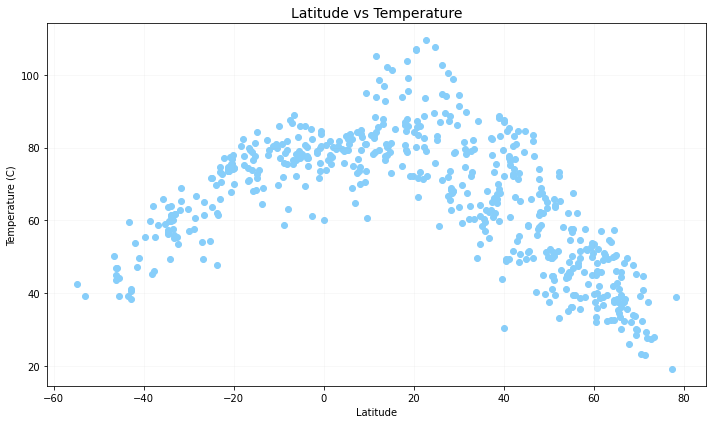

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Temperature, color = 'lightskyblue')

plt.title("Latitude vs Temperature", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVtemp.png")
plt.show()

In [19]:
# The code for Latitude vs Temperature is analyzing how temperature changes as latitude changes. 
# We see that temperature increases the close to the equator (0 on Latitude) and colder as you move away both positive and negative.

## Latitude vs. Humidity Plot

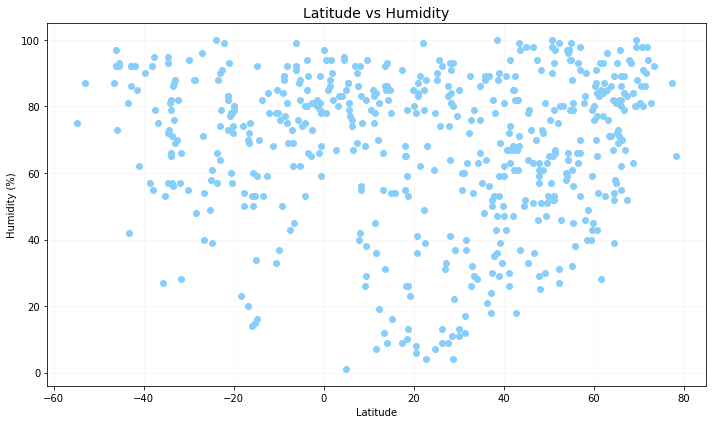

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Humidity, color = 'lightskyblue')

plt.title("Latitude vs Humidity", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVhumid.png")
plt.show()

In [21]:
# The code for Latitude vs Humidity is analyzing how humidity varies across latitudes. 
# Humidity seems to not have a strong correlation with latitude. The plot shows that humidity is consistently high at latitude 0 and that there is more varience in the data on either side of it. 

## Latitude vs. Cloudiness Plot

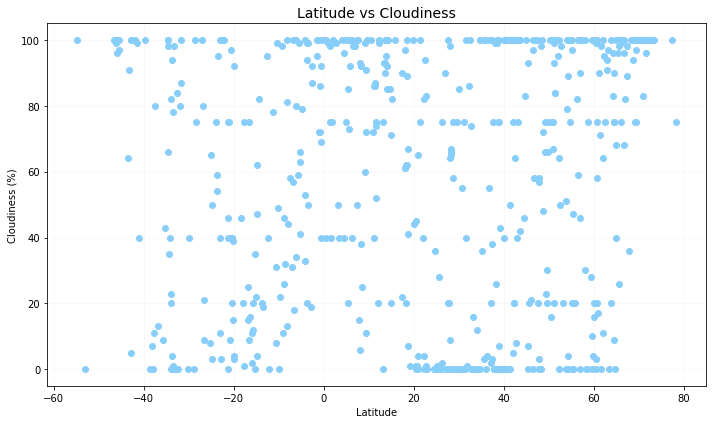

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Cloudiness, color = 'lightskyblue')

plt.title("Latitude vs Cloudiness", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVclouds.png")
plt.show()

In [23]:
# The code for Latitude vs Cloudiness is analyzing how cloudiness varies across latitudes. 
# There seems to be no correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

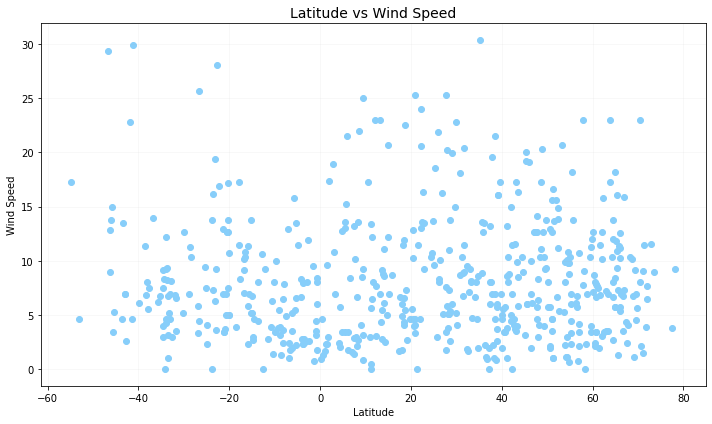

In [24]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Wind_Speed, color = 'lightskyblue')

plt.title("Latitude vs Wind Speed", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVwind.png")
plt.show()

In [25]:
# The code for Latitude vs Wind Speed is analyzing how wind speed varies across latitudes. 
# There seems to be no correlation between wind speed and latitude.

## Linear Regression

In [26]:
# Seperate data into North and South Hemispheres
nh_mask = df2.Latitude >= 0
sh_mask = df2.Latitude < 0

nh = df2.loc[nh_mask]
sh = df2.loc[sh_mask]

sh.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Punta Arenas,CL,-53.1500,-70.9167,1653147446,4.61,997,87,39.31,0
1,Yeppoon,AU,-23.1333,150.7333,1653147447,19.37,1016,90,65.98,100
3,Necochea,AR,-38.5473,-58.7368,1653147450,11.34,1018,57,59.77,0
4,Vao,NC,-22.6667,167.4833,1653147451,28.07,1012,91,72.66,100
5,Vaini,TO,-21.2000,-175.2000,1653147453,3.44,1015,83,73.56,75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6436918227430426


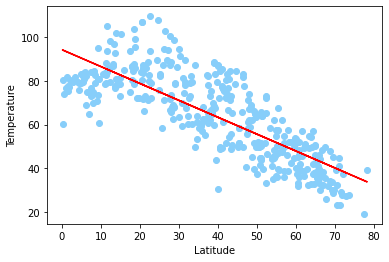

In [27]:
x_values = nh['Latitude']
y_values = nh['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [28]:
# This linear regression proves that as we move away from 0 latitude, temperatures decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.725229690415067


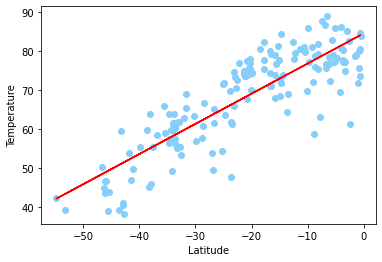

In [29]:
x_values = sh['Latitude']
y_values = sh['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [30]:
# This shows a similar trend as the northern hemisphere. 
# There are more outliers in this data, specifically lower temeratures. This could be the result of climate change.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024961487595675878


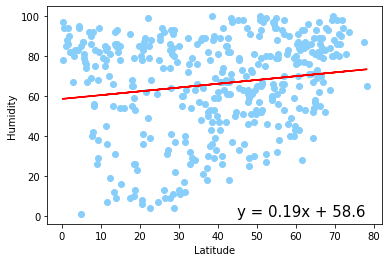

In [31]:
x_values = nh['Latitude']
y_values = nh['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [32]:
# There is no linear relationship between the latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010851440205772585


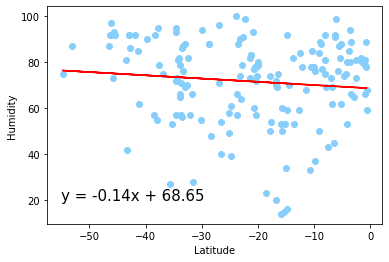

In [33]:
x_values = sh['Latitude']
y_values = sh['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [34]:
# The same observation can be made on the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008720276547437199


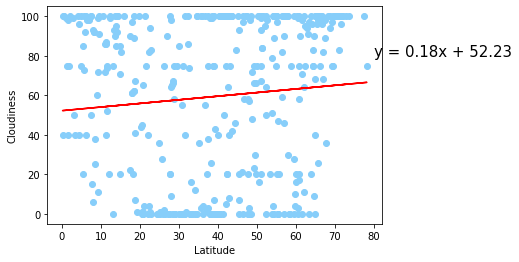

In [35]:
x_values = nh['Latitude']
y_values = nh['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(80,80),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [36]:
# There is no linear relationship between cloudiness and laitude based on the regression.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00044734074439270883


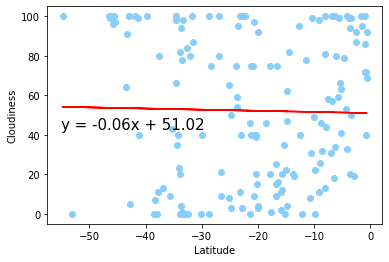

In [37]:
x_values = sh['Latitude']
y_values = sh['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,43),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [38]:
# Similar to the northern hemisphere, there is no linear relationship between cloudiness and laitude based on the regression.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00042683430406043207


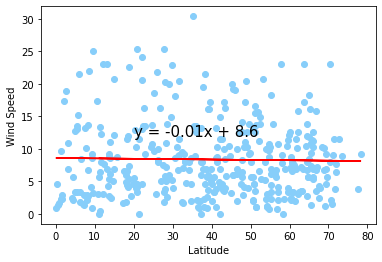

In [39]:
x_values = nh['Latitude']
y_values = nh['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,12),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [40]:
# There is a slight correlation between wind speed and latitude.
# Despite the regression being better than that of cloudiness and humidity, there are still a fair amount of outliers on the plot. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.074657383966313


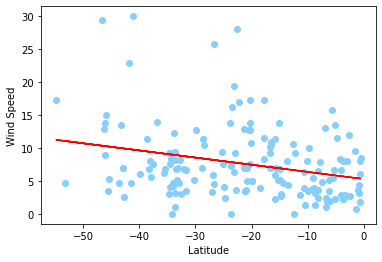

In [41]:
x_values = sh['Latitude']
y_values = sh['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,12),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [42]:
# The southern hemisphere shows a better regression, but this could be the result of less data points being available.